In [123]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [124]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-17 22:17:03--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.13’

AB_NYC_2019.csv.13  100%[===================>]   6.75M  6.25MB/s    in 1.1s    

2021-09-17 22:17:05 (6.25 MB/s) - ‘AB_NYC_2019.csv.13’ saved [7077973/7077973]



In [125]:
df = pd.read_csv('AB_NYC_2019.csv')
len(df)

48895

In [126]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Data preparation

In [127]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [128]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [129]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [130]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


# Exploratory data analysis

#### Distribution of price

<AxesSubplot:xlabel='price', ylabel='Count'>

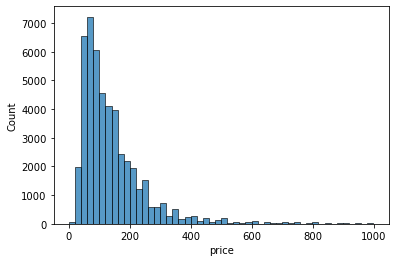

In [131]:
sns.histplot(df.price[df.price < 1000], bins=50)

In [132]:
price_logs = np.log1p(df.price)
price_logs

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price, Length: 48895, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

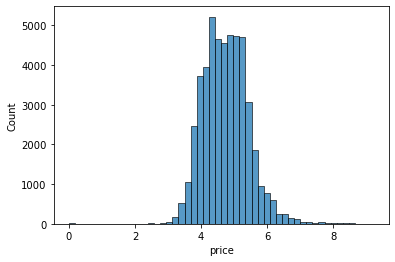

In [133]:
sns.histplot(price_logs, bins=50)

In [134]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Q3 (null) Setting up the validation framework

In [135]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [136]:
n_val, n_test, n_train

(9779, 9779, 29337)

In [137]:
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

# Training a linear regression model

In [138]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Flat Price baseline model

In [139]:
base = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [140]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [141]:
#df['reviews_per_month'] = df['reviews_per_month'].fillna(value=0)
#df['reviews_per_month'] = df['reviews_per_month'].fillna(value=1.090910)

In [142]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [143]:
y_pred = w_0 + X_train.dot(w)

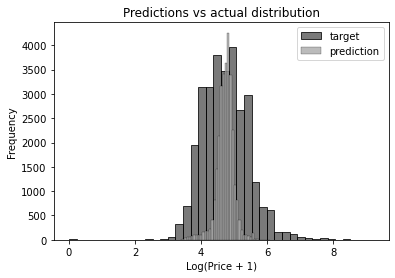

In [144]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

# RMSE

In [145]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [146]:
round(rmse(y_train,y_pred),2)

0.64

# Validating the model

In [147]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
rmse(y_val, y_pred)

0.6430337788626718

# Simple feature engineering

In [148]:
df_train.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Regularization

In [149]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [150]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.0000001)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.64

# Tuning the model

In [155]:
for r in [0.0, 0.0001, 0.001, 0.01, 0.1, 1]:
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred),2)
    
    print(r, w_0, score)

0.0 -419.9126581640378 0.64
0.0001 -414.9764921696666 0.64
0.001 -375.27365237202883 0.64
0.01 -191.78384043329459 0.66
0.1 -32.562560546084626 0.68
1 -3.499216835988334 0.68


# Q5

In [164]:
score_it = np.empty(10,dtype=object)

In [165]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)

    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train.price.values
    y_val_orig = df_val.price.values
    y_test_orig = df_test.price.values

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    rmse(y_val, y_pred)
    
    score_it[s] = rmse(y_val,y_pred)

In [168]:
round(np.std(score_it),3)

0.004

In [169]:
s

9

## Q6

In [170]:
df_full_train = pd.concat([df_train, df_val])

In [171]:
df_full_train = df_full_train.reset_index(drop=True)

In [172]:
X_full_train = prepare_X(df_full_train)

In [173]:
X_full_train

array([[ 4.069252e+01, -7.393787e+01,  1.000000e+00, ...,  1.000000e+00,
         1.000000e+00,  3.440000e+02],
       [ 4.068301e+01, -7.399677e+01,  5.000000e+00, ...,  0.000000e+00,
         1.000000e+00,  3.300000e+01],
       [ 4.071906e+01, -7.394039e+01,  4.000000e+00, ...,  1.600000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.078498e+01, -7.397284e+01,  1.000000e+00, ...,  1.400000e-01,
         1.000000e+00,  3.650000e+02],
       [ 4.068774e+01, -7.391550e+01,  2.900000e+01, ...,  2.160000e+00,
         1.000000e+00,  2.220000e+02],
       [ 4.072241e+01, -7.398554e+01,  5.000000e+00, ...,  1.000000e+00,
         1.000000e+00,  3.200000e+01]])

In [174]:
y_full_train = np.concatenate([y_train, y_val])

In [175]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [176]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.6462087202635681